Size: 100, k=1001, Time: 0.0000 ms
Size: 10100, k=1001, Time: 2.0077 ms
Size: 20100, k=1001, Time: 0.0000 ms
Size: 30100, k=1001, Time: 19.4471 ms
Size: 40100, k=1001, Time: 17.1630 ms
Size: 50100, k=1001, Time: 19.2707 ms
Size: 60100, k=1001, Time: 17.3745 ms
Size: 70100, k=1001, Time: 30.4785 ms
Size: 80100, k=1001, Time: 34.6677 ms
Size: 90100, k=1001, Time: 33.1192 ms


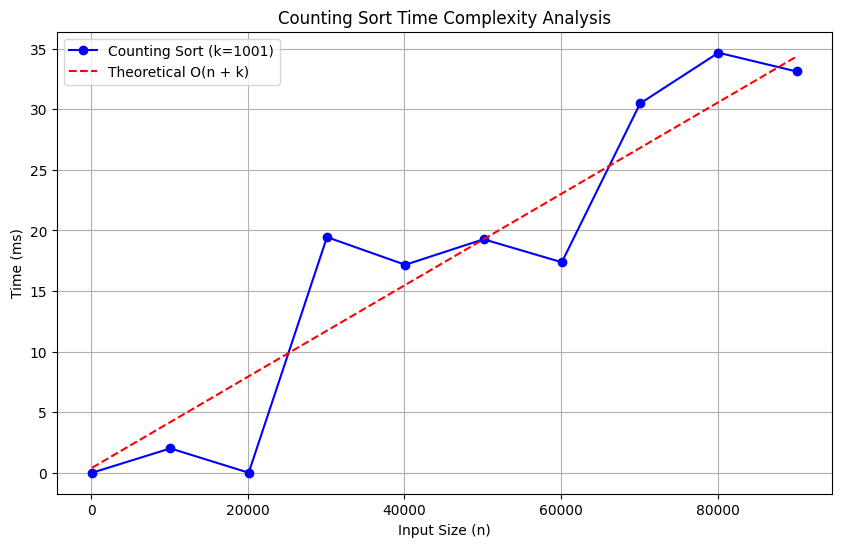

In [10]:
import matplotlib.pyplot as plt
import random
import time
import math

def countingSort(arr):
    if not arr:
        return arr  # Handle empty array

    # Step 1: Find the maximum element
    max_val = max(arr)

    # Step 2: Create a count array of size (max_val + 1)
    count = [0] * (max_val + 1)

    # Step 3: Count the frequency of each element
    for num in arr:
        count[num] += 1

    # Step 4: Reconstruct the sorted array
    index = 0
    for i in range(len(count)):
        while count[i] > 0:
            arr[index] = i
            index += 1
            count[i] -= 1

    return arr

# Input sizes to test
input_sizes = list(range(100, 100001, 10000))  # From 100 to 10,000
execution_times = []

# Fixed k (range of values) for fair comparison
k = 1001  # Values will be in 0-1000

for size in input_sizes:
    arr = [random.randint(0, k-1) for _ in range(size)]  # Values in [0, k-1]
    
    start_time = time.time()
    countingSort(arr)
    end_time = time.time()
    
    elapsed_time = (end_time - start_time) * 1000  # ms
    execution_times.append(elapsed_time)
    print(f"Size: {size}, k={k}, Time: {elapsed_time:.4f} ms")

# Theoretical O(n + k) scaling
median_idx = len(input_sizes) // 2
median_n = input_sizes[median_idx]
median_time = execution_times[median_idx]
scaling_factor = median_time / (median_n + k)  # O(n + k) model

theoretical_times = [scaling_factor * (n + k) for n in input_sizes]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, 'b-o', label=f'Counting Sort (k={k})')
plt.plot(input_sizes, theoretical_times, 'r--', label='Theoretical O(n + k)')
plt.title("Counting Sort Time Complexity Analysis")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (ms)")
plt.legend()
plt.grid(True)
plt.show()

